In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import pyplot as plt

df = pd.read_csv('/kaggle/input/usa-housing/USA_Housing.csv')
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [2]:
df.drop(columns = 'Address', inplace = True)

In [3]:
df.shape

(5000, 6)

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


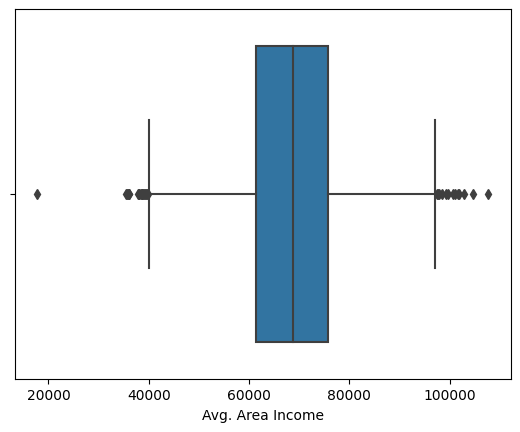

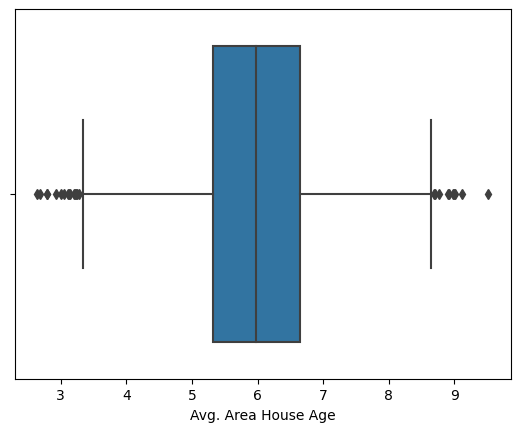

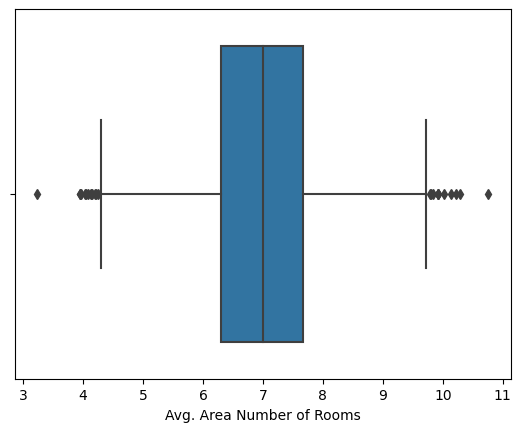

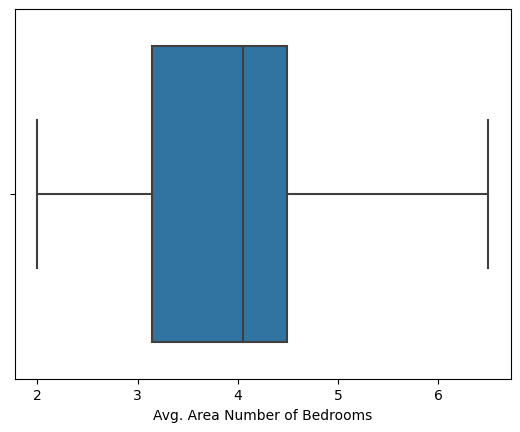

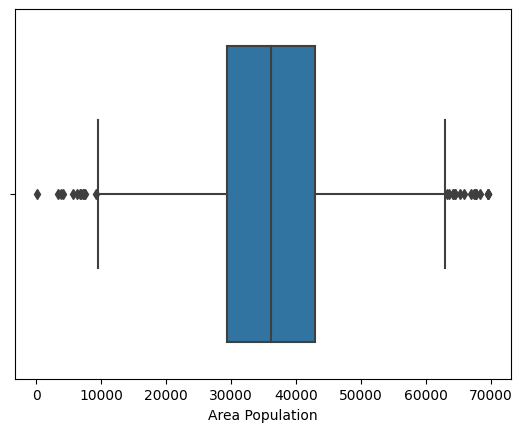

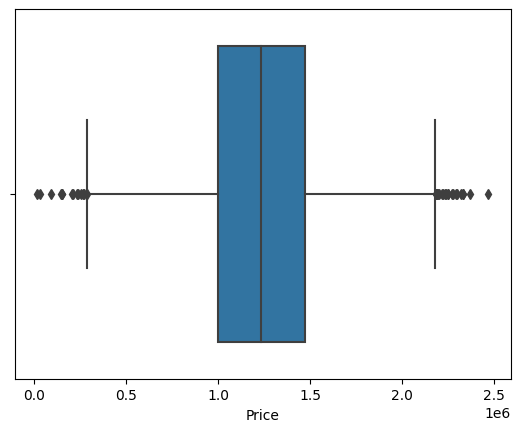

In [5]:
for col in df.columns:
    sns.boxplot(data = df, x = col)
    plt.show()

In [6]:
# remove outliers from all columns except price
cols = df.drop(columns = 'Price').columns

for col in cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5*(iqr)
    lower_bound = q3 - 1.5*(iqr)
    df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]   

In [7]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
5,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06
...,...,...,...,...,...,...
4993,69639.140896,5.007510,7.778375,6.05,54056.128430,1.381831e+06
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler

X = df.drop(columns = ['Price'], axis= 1)
y = df['Price']
print(X.shape, y.shape)

(3188, 5) (3188,)


In [9]:
sc = StandardScaler()
X = sc.fit_transform(X)
X

array([[ 1.01713396, -0.55597964, -0.22549247, -0.08029175, -1.74472048],
       [ 0.98384252, -0.16752075, -0.55720468, -0.92502175,  0.3069183 ],
       [-1.03076075, -0.33382181,  1.56617867,  0.79822745, -0.08823896],
       ...,
       [ 0.89889484,  1.04169758, -0.74078612, -0.13942285, -1.44101229],
       [-0.27767656, -0.73619427, -0.08135731,  1.06009375,  0.60140868],
       [-0.55704359, -0.18038023, -0.4839011 , -0.09718635,  1.06678006]])

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.2)

In [11]:
lr = LinearRegression()

lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)


In [12]:
r2 = r2_score(y_test, y_pred)
print(f'r2 : {r2}')
mse = mean_squared_error(y_test, y_pred)
print(f'mse : {mse}')
mae = mean_absolute_error(y_test, y_pred)
print(f'mae : {mae}')
print(f'rmse : {mse**0.5}')

r2 : 0.8887592543399061
mse : 10919154854.85522
mae : 84574.82884810984
rmse : 104494.75993969852


Text(0, 0.5, 'Predicted Price')

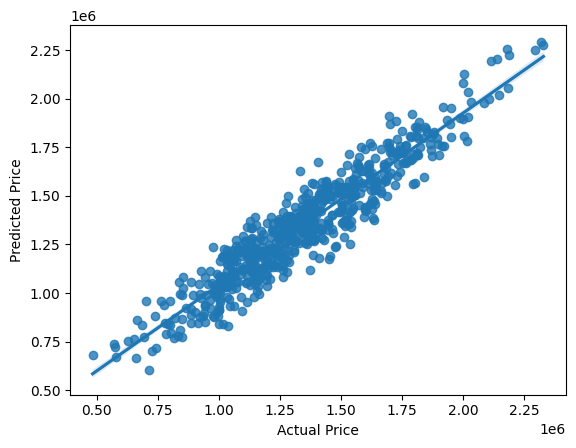

In [13]:
sns.regplot(x = y_test, y = y_pred)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')